In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)

In [8]:
df1 = pd.read_csv('/content/drive/MyDrive/Hackaton/Apartamento_arriendo_09.csv', encoding='utf-8')
df2 = pd.read_csv('/content/drive/MyDrive/Hackaton/Casa_arriendo_09.csv', encoding='utf-8')

House_apart = pd.concat([df1, df2], axis=0, ignore_index=True)
House_apart

House_apart = House_apart[House_apart['mode'] != 'Venta y Arriendo']

House_apart.drop(columns=['Unnamed: 0',
                          'date',
                          'id',
                          'mode',
                          #'details',
                          'description',
                          'surface',
                          'rooms',
                          'baths',
                          'park'], inplace = True)

House_apart['location'] = House_apart['location'].str.lower()

a,b = 'áéíóúü','aeiouu'
def normalizar(s):
    trans = str.maketrans(a,b)
    return s.translate(trans)
House_apart["location"] = House_apart["location"].apply(normalizar)

House_apart['location'] = House_apart['location'].str.strip()

House_apart.dropna(inplace=True)

House_apart['price'] = House_apart['price'].str.replace('.', '', regex=False).str.replace('$', '', regex=False)

House_apart['price'] = House_apart['price'].str.strip()

House_apart['price'] = House_apart['price'].astype(float)

House_apart['price'].mean() # 3159853.220141343
House_apart['price'].std() # 15238047.72039516

q_low = House_apart['price'].quantile(0.005)
q_hi = House_apart['price'].quantile(0.99)

House_apart = House_apart[(House_apart['price'] < q_hi) & (House_apart['price'] > q_low)]

House_apart.reset_index(inplace=True)
print(len(House_apart))
for i in range(len(House_apart)):
  try:
    House_apart.loc[i, "lat"]=float(House_apart.loc[i, "lat"])
    House_apart.loc[i, "long"]=float(House_apart.loc[i, "long"])

  except:
    House_apart.drop(i, inplace=True)


7270


In [ ]:
# Mapa
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[6.2442, -75.5812], zoom_start=12)
mapa

puntos = House_apart[['lat', 'long', 'price']].values.tolist()
HeatMap(puntos, radius=10).add_to(mapa)
mapa

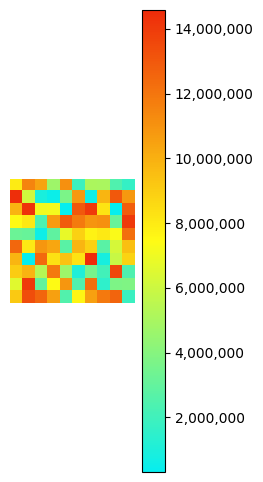

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

data = np.random.randint(238000.0, 14600000.0, (10, 10))

fig, ax = plt.subplots(figsize=(2, 6))

colors = ['#06EEEF', '#FFFB15', '#EE2B0A']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=256)

cax = ax.matshow(data, cmap=cmap)

ax.axis('off')

cbar = fig.colorbar(cax)

cbar.formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
cbar.update_ticks()

plt.show()

In [17]:
House_apart['price'].min()

238000.0

In [18]:
House_apart['price'].max()

14600000.0